# Проект: Линейные модели в машинном обучении

В рамках данного проекта предстоит разработать модель машинного обучения, которая поможет молочному хозяйству управлять рисками и принимать объективное решение о покупке коров. 

Задача: необходимо создать две прогнозные модели для отбора коров: первая будет прогнозировать возможный удой коровы;
вторая — рассчитывать вероятность получить вкусное молоко от коровы. С помощью модели нужно отобрать коров по двум критериям:
средний удой за год — не менее 6000 килограммов;
молоко должно быть вкусным.

План работы:

- Изучить информацию о датафреймах;

- Сделать предобработку данных;

- Сделать исследовательский анализ данных;

- Провести корреляционный анализ признаков в датасете ferma_main.csv;

- Обучить три модели простой линейной регрессии;

- Решить задачу классификации;

- Сделать выводы.



Описание данных:

- Файл ferma_main.csv содержит данные о стаде фермера на текущий момент. Описание данных:

id — уникальный идентификатор коровы.

Удой, кг — масса молока, которую корова даёт в год (в килограммах).

ЭКЕ (Энергетическая кормовая единица) — показатель питательности корма коровы.

Сырой протеин, г — содержание сырого протеина в корме (в граммах).

СПО (Сахаро-протеиновое соотношение) — отношение сахара к протеину в корме коровы.

Порода — порода коровы.

Тип пастбища — ландшафт лугов, на которых паслась корова.

порода папы_быка — порода папы коровы.

Жирность,% — содержание жиров в молоке (в процентах).

Белок,% — содержание белков в молоке (в процентах).

Вкус молока — оценка вкуса по личным критериям фермера, бинарный признак (вкусно, не вкусно).

Возраст — возраст коровы, бинарный признак (менее_2_лет, более_2_лет).

- Файл ferma_dad.csv хранит имя папы каждой коровы в стаде фермера. Описание данных:

id — уникальный идентификатор коровы.

Имя Папы — имя папы коровы.

- Файл cow_buy.csv — это данные о коровах «ЭкоФермы», которых фермер хочет изучить перед покупкой. Описание данных:

Порода — порода коровы.

Тип пастбища — ландшафт лугов, на которых паслась корова.

порода папы_быка — порода папы коровы.

Имя_папы — имя папы коровы.

Текущая_жирность,% — содержание жиров в молоке (в процентах).

Текущий_уровень_белок,% — содержание белков в молоке (в процентах).

Возраст — возраст коровы, бинарный признак (менее_2_лет, более_2_лет).

In [1]:
!pip install phik -q
!pip install --upgrade scikit-learn -q

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn
import os
import phik
from scipy import stats as st
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression

from sklearn.metrics import (
    mean_squared_error, 
    mean_absolute_error, 
    r2_score, accuracy_score, 
    confusion_matrix, 
    recall_score, 
    precision_score
)

from sklearn.preprocessing import StandardScaler, OneHotEncoder

RANDOM_STATE = 42

## Загрузка данных

In [2]:
pth1 = '/datasets/ferma_main.csv'
pth2 = 'https://code.s3.yandex.net/datasets/ferma_main.csv'

if os.path.exists(pth1):
    data_main = pd.read_csv(pth1, sep = ';', decimal = ',')
elif os.path.exists(pth2):
    data_main = pd.read_csv(pth2, sep = ';', decimal = ',')
else:
    print('Something is wrong')
    
display(data_main.head())
data_main.info()

,id,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,порода папы_быка,"Жирность,%","Белок,%",Вкус молока,Возраст
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинные,Соверин,3.54,3.079,вкусно,менее_2_лет
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинные,Соверин,3.73,3.073,вкусно,менее_2_лет


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     634 non-null    int64  
 1   Удой, кг                               634 non-null    int64  
 2   ЭКЕ (Энергетическая кормовая единица)  634 non-null    float64
 3   Сырой протеин, г                       634 non-null    int64  
 4   СПО (Сахаро-протеиновое соотношение)   634 non-null    float64
 5   Порода                                 634 non-null    object 
 6   Тип пастбища                           634 non-null    object 
 7   порода папы_быка                       634 non-null    object 
 8   Жирность,%                             634 non-null    float64
 9   Белок,%                                634 non-null    float64
 10  Вкус молока                            634 non-null    object 
 11  Возрас

In [3]:
pth3 = '/datasets/ferma_dad.csv'
pth4 = 'https://code.s3.yandex.net/datasets/ferma_dad.csv'

if os.path.exists(pth3):
    data_dad = pd.read_csv(pth3, sep = ';')
elif os.path.exists(pth4):
    data_dad = pd.read_csv(pth4, sep = ';')
else:
    print('Something is wrong')
    
display(data_dad.head())
data_dad.info()

,id,Имя Папы
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        629 non-null    int64 
 1   Имя Папы  629 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.0+ KB


In [4]:
pth5 = '/datasets/cow_buy.csv'
pth6 = 'https://code.s3.yandex.net/datasets/cow_buy.csv'

if os.path.exists(pth5):
    data_cow = pd.read_csv(pth5, sep = ';', decimal = ',')
elif os.path.exists(pth6):
    data_cow = pd.read_csv(pth6, sep = ';', decimal = ',')
else:
    print('Something is wrong')
    
display(data_cow.head())
data_cow.info()

,Порода,Тип пастбища,порода папы_быка,Имя_папы,"Текущая_жирность,%","Текущий_уровень_белок,%",Возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Порода                   20 non-null     object 
 1   Тип пастбища             20 non-null     object 
 2   порода папы_быка         20 non-null     object 
 3   Имя_папы                 20 non-null     object 
 4   Текущая_жирность,%       20 non-null     float64
 5   Текущий_уровень_белок,%  20 non-null     float64
 6   Возраст                  20 non-null     object 
dtypes: float64(2), object(5)
memory usage: 1.2+ KB


Выводы:

В датафрейме data_main 634 записи, названия столбцов адекватны содержащимся в них данным, но введены на кириллице, в столбцах id, Удой, Сырой протеин тип данных int, в столбцах ЭКЕ (Энергетическая кормовая единица), СПО (Сахаро-протеиновое соотношение),  Порода, Тип пастбища, порода папы_быка, Жирность, Белок, Вкус молока, Возраст тип данных object.

В датафрейме data_dad 629 записи, названия столбцов адекватны содержащимся в них данным, но введены на кириллице, в столбце id тип данных int, в столбце Имя Папы тип данных object.

В датафрейме data_cow 20 записей, названия столбцов адекватны содержащимся в них данным, но введены на кириллице, в столбцах Тип пастбища, порода папы_быка, Имя_папы, Текущая_жирность, Текущий_уровень_белок, Возраст тип данных object.

Требуется коректировка названий столбцов, изменение типа данных в ЭКЕ (Энергетическая кормовая единица), СПО (Сахаро-протеиновое соотношение), Жирность,%, Белок,%, Текущая_жирность,%, Текущий_уровень_белок,% на float (нужны будут для подсчета), а также предобработка данных (проверка наличия пропусков и дубликатов).

##  Предобработка данных

In [5]:
# приведем в порядок названия столбцов
data_main.rename(
    columns={
        'Удой, кг':'milk_yield',
        'ЭКЕ (Энергетическая кормовая единица)':'energy_feed_unit',
        'Сырой протеин, г':'crude_protein',
        'СПО (Сахаро-протеиновое соотношение)':'sugar_protein_ratio',
        'Порода':'breed',
        'Тип пастбища':'pasture',
        'порода папы_быка':'dad_breed',
        'Жирность,%':'fat',
        'Белок,%':'protein',
        'Вкус молока':'taste',
        'Возраст':'age'
    },
    inplace=True
)

In [6]:
data_dad.rename(columns = {'Имя Папы':'dad'}, inplace = True )

In [7]:
data_cow.rename(
    columns={
        'Порода':'breed',
        'Тип пастбища':'pasture',
        'порода папы_быка':'dad_breed',
        'Имя_папы':'dad',
        'Текущая_жирность,%':'current_fat',
        'Текущий_уровень_белок,%':'current_protein',
        'Возраст':'age'
    },
    inplace=True
)

In [8]:
# проверяем замены в названиях
display(data_main.head())

,id,milk_yield,energy_feed_unit,crude_protein,sugar_protein_ratio,breed,pasture,dad_breed,fat,protein,taste,age
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинные,Соверин,3.54,3.079,вкусно,менее_2_лет
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинные,Соверин,3.73,3.073,вкусно,менее_2_лет


In [9]:
display(data_dad.head())

,id,dad
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин


In [10]:
display(data_cow.head())

,breed,pasture,dad_breed,dad,current_fat,current_protein,age
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет


In [11]:
# проверяем наличие пропущенных значений в датафреймах
data_main.isna().sum()

id                     0
milk_yield             0
energy_feed_unit       0
crude_protein          0
sugar_protein_ratio    0
breed                  0
pasture                0
dad_breed              0
fat                    0
protein                0
taste                  0
age                    0
dtype: int64

In [12]:
data_dad.isna().sum()

id     0
dad    0
dtype: int64

In [13]:
data_cow.isna().sum()

breed              0
pasture            0
dad_breed          0
dad                0
current_fat        0
current_protein    0
age                0
dtype: int64

In [14]:
# преобразуем данные в нужный тип
data_main['energy_feed_unit'] = (data_main['energy_feed_unit']).astype('float')
data_main['sugar_protein_ratio'] = (data_main['sugar_protein_ratio']).astype('float')
data_main['fat'] = (data_main['fat']).astype('float')
data_main['protein'] = (data_main['protein']).astype('float')
data_cow['current_fat'] = (data_cow['current_fat']).astype('float')
data_cow['current_protein'] = (data_cow['current_protein']).astype('float')

In [15]:
# проверяем замены типа данных
data_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   634 non-null    int64  
 1   milk_yield           634 non-null    int64  
 2   energy_feed_unit     634 non-null    float64
 3   crude_protein        634 non-null    int64  
 4   sugar_protein_ratio  634 non-null    float64
 5   breed                634 non-null    object 
 6   pasture              634 non-null    object 
 7   dad_breed            634 non-null    object 
 8   fat                  634 non-null    float64
 9   protein              634 non-null    float64
 10  taste                634 non-null    object 
 11  age                  634 non-null    object 
dtypes: float64(4), int64(3), object(5)
memory usage: 59.6+ KB


In [16]:
data_cow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   breed            20 non-null     object 
 1   pasture          20 non-null     object 
 2   dad_breed        20 non-null     object 
 3   dad              20 non-null     object 
 4   current_fat      20 non-null     float64
 5   current_protein  20 non-null     float64
 6   age              20 non-null     object 
dtypes: float64(2), object(5)
memory usage: 1.2+ KB


In [17]:
# проверяем наличие дубликатов в датафреймах и удаляем их
data_main.duplicated().sum()

5

In [18]:
data_main = data_main.drop_duplicates()

In [19]:
data_dad.duplicated().sum()

0

In [20]:
data_cow.duplicated().sum()

4

Это 20% данных, не будем их удалять, т.к. это могут быть разные коровы с одинаковыми параметрами.

In [21]:
# проверяем значения в столбцах
data_main['pasture'].unique()

array(['Равнинное', 'Равнинные', 'Холмистое'], dtype=object)

In [22]:
data_cow['pasture'].unique()

array(['холмистое', 'равнинное'], dtype=object)

In [23]:
data_main['pasture'] = data_main['pasture'].replace('Равнинные', 'Равнинное')

In [24]:
data_main['dad_breed'].unique()

array(['Айдиал', 'Соверин', 'Айдиалл'], dtype=object)

In [25]:
data_cow['dad_breed'].unique()

array(['Айдиал', 'Соверин'], dtype=object)

In [26]:
data_main['dad_breed'] = data_main['dad_breed'].replace('Айдиалл', 'Айдиал')

In [27]:
data_cow['pasture'] = data_cow['pasture'].replace('холмистое', 'Холмистое')

In [28]:
data_cow['pasture'] = data_cow['pasture'].replace('равнинное', 'Равнинное')

In [29]:
data_main.columns = data_main.columns.str.lower()
data_cow.columns = data_cow.columns.str.lower()
data_dad.columns = data_dad.columns.str.lower()

In [30]:
data_main.shape

(629, 12)

In [31]:
data_dad.shape

(629, 2)

In [32]:
data_cow.shape

(20, 7)

Выводы:

Были изменены названия столбцов;

Проверено, нет ли пропущенных значений;

Были удалены явные и неявные дубликаты в data_main;

Столбцы energy_feed_unit, sugar_protein_ratio, fat, protein, current_fat, current_protein приведены к float типу.

Данные готовы к исследовательскому анализу.

## Исследовательский анализ данных

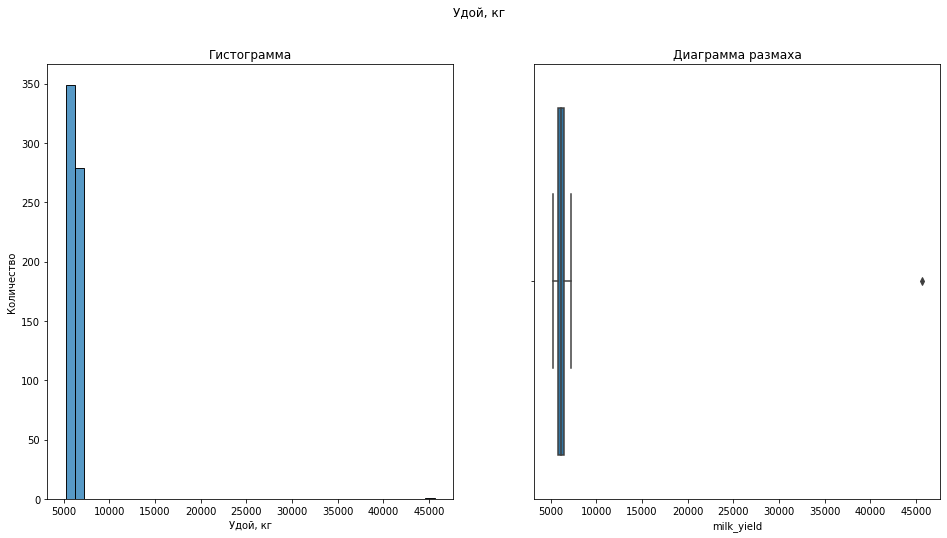

In [33]:
fig, axs = plt.subplots(nrows= 1 , ncols= 2, figsize = (16,8))
sns.histplot(data = data_main,x = 'milk_yield', ax=axs[0], bins = 40)
axs[0].set_xlabel('Удой, кг')
axs[0].set_ylabel('Количество')
axs[0].set_title('Гистограмма')
sns.boxplot(data = data_main,x = 'milk_yield', ax=axs[1])
axs[1].set_title('Диаграмма размаха')
fig.suptitle('Удой, кг')
plt.show()

In [34]:
# убираем выброс
data_main = data_main.loc[data_main['milk_yield'] <= 10000]

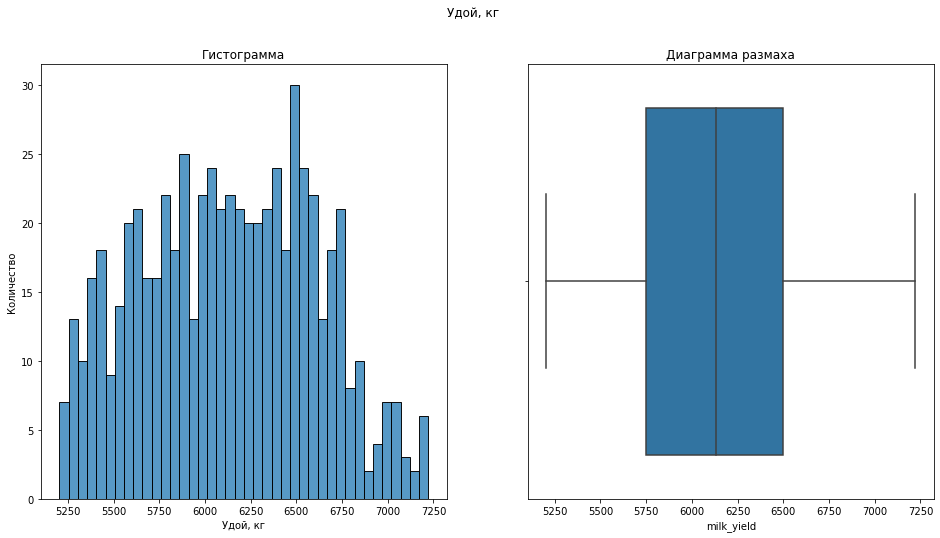

count     628.000000
mean     6125.968153
std       475.857053
min      5204.000000
25%      5749.750000
50%      6132.500000
75%      6501.000000
max      7222.000000
Name: milk_yield, dtype: float64

In [35]:
# проведем анализ признака "Удой" без выброса
fig, axs = plt.subplots(nrows= 1 , ncols= 2, figsize = (16,8))
sns.histplot(data = data_main,x = 'milk_yield', ax=axs[0], bins = 40)
axs[0].set_xlabel('Удой, кг')
axs[0].set_ylabel('Количество')
axs[0].set_title('Гистограмма')
sns.boxplot(data = data_main,x = 'milk_yield', ax=axs[1])
axs[1].set_title('Диаграмма размаха')
fig.suptitle('Удой, кг')
plt.show()

data_main['milk_yield'].describe()

Показатели удоя находятся в диапазоне от 5204 до 7222, медиана - 6132. 

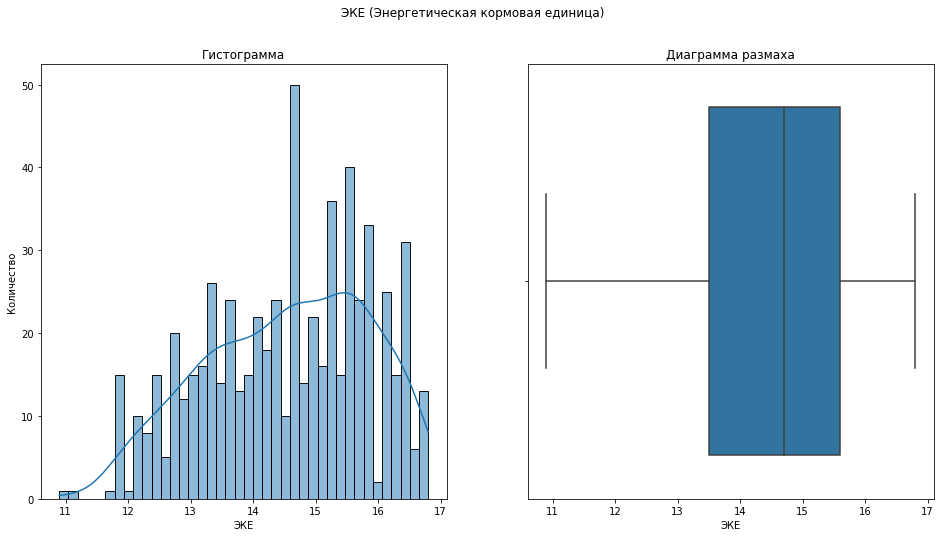

count    628.000000
mean      14.548726
std        1.301777
min       10.900000
25%       13.500000
50%       14.700000
75%       15.600000
max       16.800000
Name: energy_feed_unit, dtype: float64

In [36]:
# проведем анализ признака "ЭКЕ"
fig, axs = plt.subplots(nrows= 1 , ncols= 2, figsize = (16,8))
sns.histplot(data = data_main,x = 'energy_feed_unit', ax=axs[0], bins = 40, kde=True)
axs[0].set_xlabel('ЭКЕ')
axs[0].set_ylabel('Количество')
axs[0].set_title('Гистограмма')  
sns.boxplot(data = data_main,x = 'energy_feed_unit', ax=axs[1])
axs[1].set_xlabel('ЭКЕ')
axs[1].set_title('Диаграмма размаха')
fig.suptitle('ЭКЕ (Энергетическая кормовая единица)')
plt.show()

data_main['energy_feed_unit'].describe()

Показатели питательности корма находятся в диапазоне от 10.9 до 16.8, медиана - 14.7.

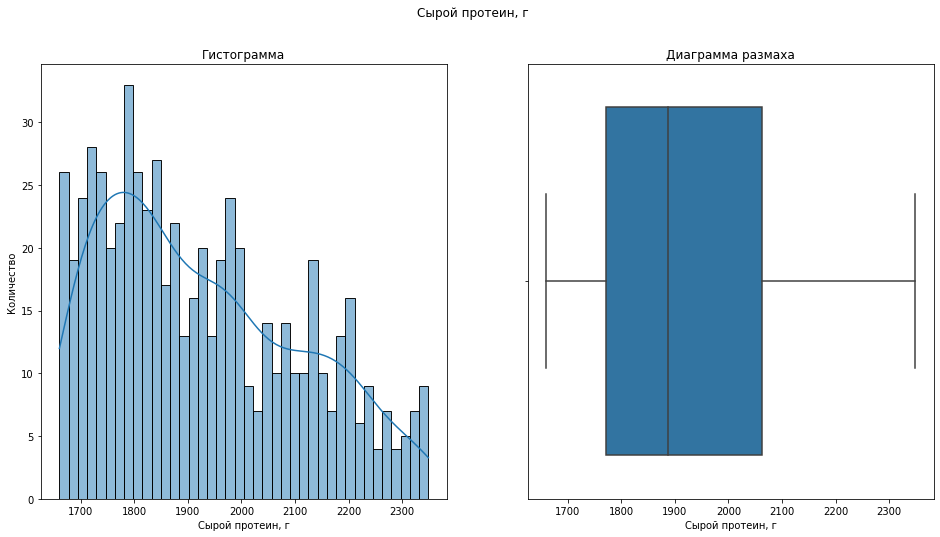

count     628.000000
mean     1923.759554
std       182.832816
min      1660.000000
25%      1771.750000
50%      1888.000000
75%      2062.250000
max      2349.000000
Name: crude_protein, dtype: float64

In [37]:
# проведем анализ признака "сырой протеин"
fig, axs = plt.subplots(nrows= 1 , ncols= 2, figsize = (16,8))
sns.histplot(data = data_main,x = 'crude_protein', ax=axs[0], bins = 40, kde=True)
axs[0].set_xlabel('Сырой протеин, г')
axs[0].set_ylabel('Количество')
axs[0].set_title('Гистограмма')  
sns.boxplot(data = data_main,x = 'crude_protein', ax=axs[1])
axs[1].set_title('Диаграмма размаха')
axs[1].set_xlabel('Сырой протеин, г')
fig.suptitle('Сырой протеин, г')
plt.show()

data_main['crude_protein'].describe()

Показатель находится в диапазоне от 1660 до 2349, медиана - 1888.

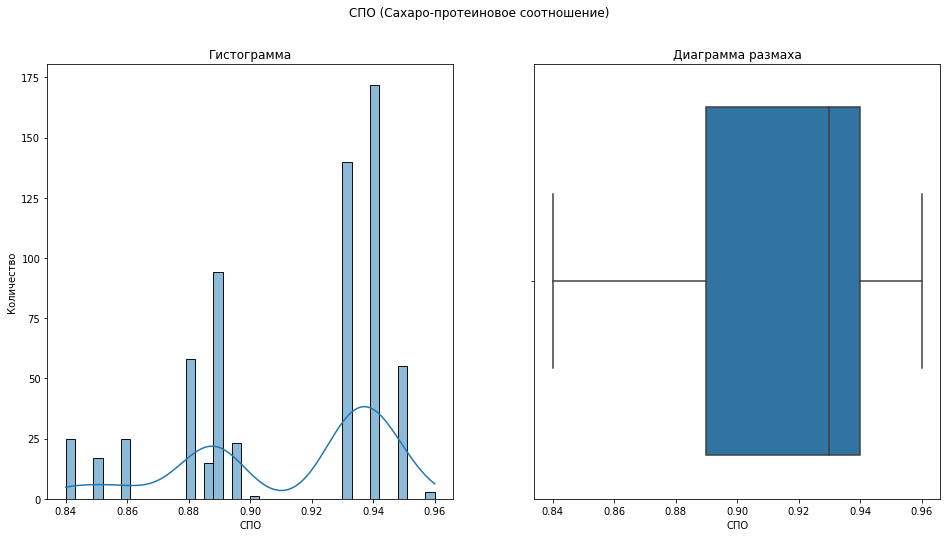

count    628.000000
mean       0.913089
std        0.032221
min        0.840000
25%        0.890000
50%        0.930000
75%        0.940000
max        0.960000
Name: sugar_protein_ratio, dtype: float64

In [38]:
# проведем анализ отношения сахара к протеину в корме
fig, axs = plt.subplots(nrows= 1 , ncols= 2, figsize = (16,8))
sns.histplot(data = data_main,x = 'sugar_protein_ratio', ax=axs[0], bins = 40, kde=True)
axs[0].set_xlabel('СПО')
axs[0].set_ylabel('Количество')
axs[0].set_title('Гистограмма')  
sns.boxplot(data = data_main,x = 'sugar_protein_ratio', ax=axs[1])
axs[1].set_title('Диаграмма размаха')
axs[1].set_xlabel('СПО')
fig.suptitle('СПО (Сахаро-протеиновое соотношение)')
plt.show()

data_main['sugar_protein_ratio'].describe()

Показатели отношения сахара к протеину в корме находятся в диапазоне от 0.84 до 0.96, медиана - 0.93. 

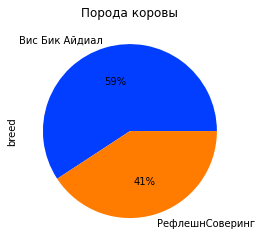

In [39]:
# проведем статистический анализ пород коровы
palette_color = sns.color_palette('bright') 
data_main['breed'].value_counts().plot(
    y = 'count', kind = 'pie', autopct='%1.0f%%', title = 'Порода коровы', colors = palette_color)
plt.show()

Коровы породы Вис Бик Айдиал наиболее популярны (58%), Рефлешн Соверинг - 41%.

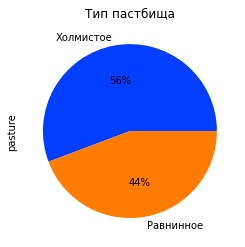

In [40]:
# проведем статистический анализ пастбищ
data_main['pasture'].value_counts().plot(
    y = 'count', kind = 'pie', autopct='%1.0f%%', title = 'Тип пастбища', colors = palette_color)
plt.show()

Коров с холмистых пастбищ - 56%, а с холмистых - 44%.

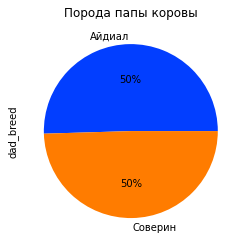

In [41]:
# проведем статистический анализ породы папы коровы
data_main['dad_breed'].value_counts().plot(
    y = 'count', kind = 'pie', autopct='%1.0f%%', title = 'Порода папы коровы', colors = palette_color)
plt.show()

Породы папы коровы - Айдиал и Соверин - распределены в данных поровну.

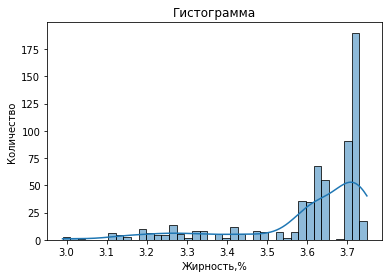

count    628.000000
mean       3.604268
std        0.168093
min        2.990000
25%        3.590000
50%        3.650000
75%        3.720000
max        3.750000
Name: fat, dtype: float64

In [42]:
# проведем анализ жирности молока
sns.histplot(data = data_main,x = 'fat',  bins = 40, kde=True)
plt.xlabel('Жирность,%')
plt.ylabel('Количество')
plt.title('Гистограмма')  
plt.show()             
             
data_main['fat'].describe()

Показатели жирности молока находятся в диапазоне от 2.9 до 3.75, медиана - 3.65.

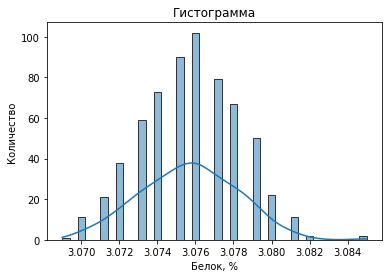

count    628.000000
mean       3.075670
std        0.002551
min        3.069000
25%        3.074000
50%        3.076000
75%        3.077000
max        3.085000
Name: protein, dtype: float64

In [43]:
# проведем анализ белка в молоке
sns.histplot(data = data_main,x = 'protein',  bins = 40, kde=True)
plt.xlabel('Белок, %')
plt.ylabel('Количество')
plt.title('Гистограмма')  
plt.show()             
             
data_main['protein'].describe()

Показатели белка находятся в диапазоне от 3.06 до 3.08, медиана - 3.07.

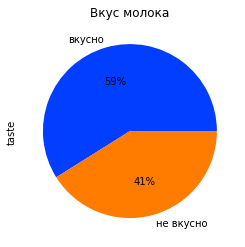

In [44]:
# проведем анализ признака "вкус"
data_main['taste'].value_counts().plot(
    y = 'count', kind = 'pie', autopct='%1.0f%%', title = 'Вкус молока',colors = palette_color)
plt.show()

59% молока - вкусное.

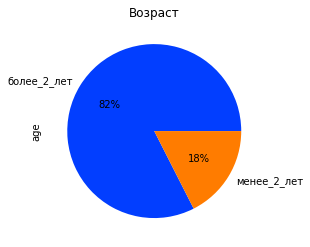

In [45]:
# проведем статистический анализ возраста коров
data_main['age'].value_counts().plot(y = 'count', kind = 'pie', autopct='%1.0f%%', title = 'Возраст',colors = palette_color)
plt.show()

У 80% коров возраст более 2 лет.

Выводы:

Показатели удоя находятся в диапазоне от 5204 до 7222, медиана - 6132 (был удален выброс). Показатели питательности корма находятся в диапазоне от 10.9 до 16.8, медиана - 14.7. Показатель "сырой протеин" находится в диапазоне от 1660 до 2349, медиана - 1888. Показатели отношения сахара к протеину в корме находятся в диапазоне от 0.84 до 0.96, медиана - 0.93. Коровы породы Вис Бик Айдиал наиболее популярны (58%), Рефлешн Соверинг - 41%. Коров с холмистых пастбищ - 56%, а с холмистых - 44%. Породы папы коровы - Айдиал и Соверин - распределены в данных поровну. Показатели жирности молока находятся в диапазоне от 2.9 до 3.75, медиана - 3.65. Показатели белка находятся в диапазоне от 3.06 до 3.08, медиана - 3.07. 59% молока - вкусное. У 80% коров возраст более 2 лет.

## Корреляционный анализ

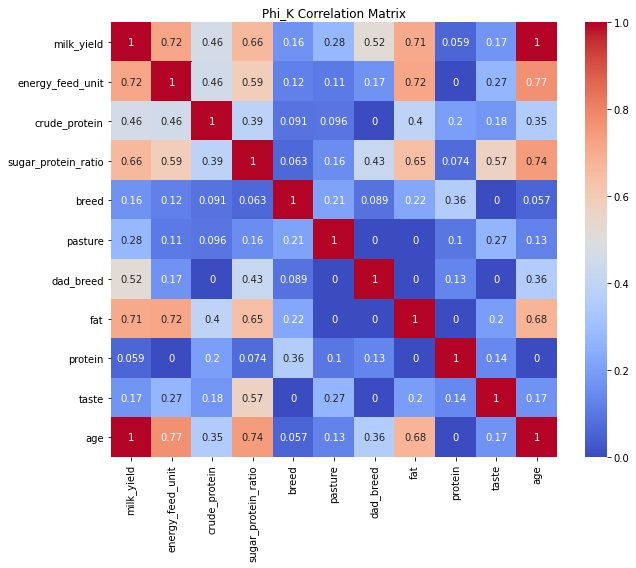

In [46]:
# Вычисление матрицы корреляции с использованием phik
data_main_m= data_main.drop('id', axis=1)
corr_matrix = data_main_m.phik_matrix(
    interval_cols=['milk_yield', 'energy_feed_unit', 'crude_protein', 'sugar_protein_ratio', 'fat', 'protein'])
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Phi_K Correlation Matrix')
plt.show()

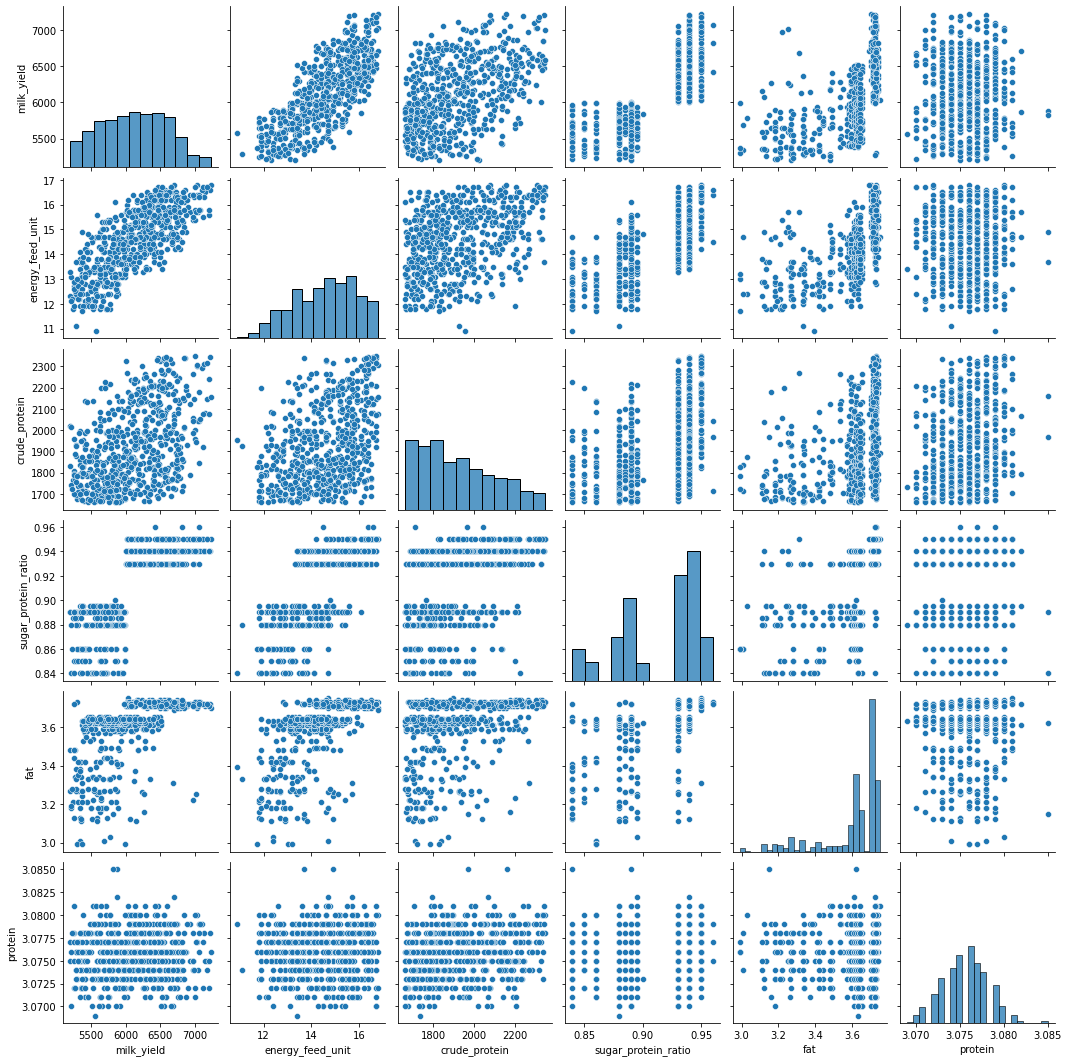

In [47]:
# изучим взаимосвязь между признаками: построим диаграммы рассеяния
sns.pairplot(data_main[['milk_yield', 'energy_feed_unit', 'crude_protein', 'sugar_protein_ratio', 'fat', 'protein']])
plt.gcf().set_size_inches(15,15);

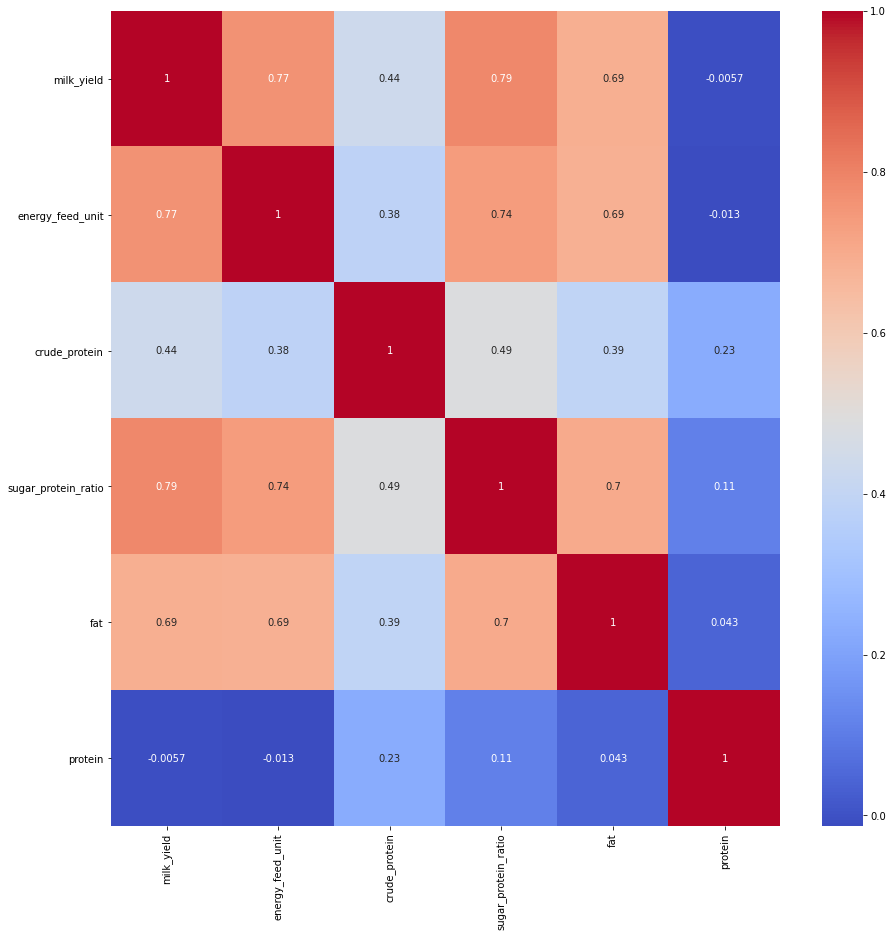

In [48]:
# рассчитаем коэффициенты корреляции между всеми признаками
analysis = data_main[['milk_yield', 'energy_feed_unit', 'crude_protein', 'sugar_protein_ratio', 'fat', 'protein', 'taste']].reset_index(
    drop=True)
sns.heatmap(analysis.corr(method= 'spearman'), cmap="coolwarm", annot=True)
plt.gcf().set_size_inches(15,15)

Сильная корреляция (0.77) наблюдается между признаками удой и ЭКЕ, между признаками удой и СПО (0.81), средняя корреляция между признаками удой и жирность (0.6), слабая корреляция между удой и сырой протеин (0.45)(коэф Пирсона). Коэффициент Спирмена: Сильная корреляция (0.77) наблюдается между признаками удой и ЭКЕ, между признаками удой и СПО (0.79), средняя корреляция между признаками удой и жирность (0.69), слабая корреляция между удой и сырой протеин (-0.005).

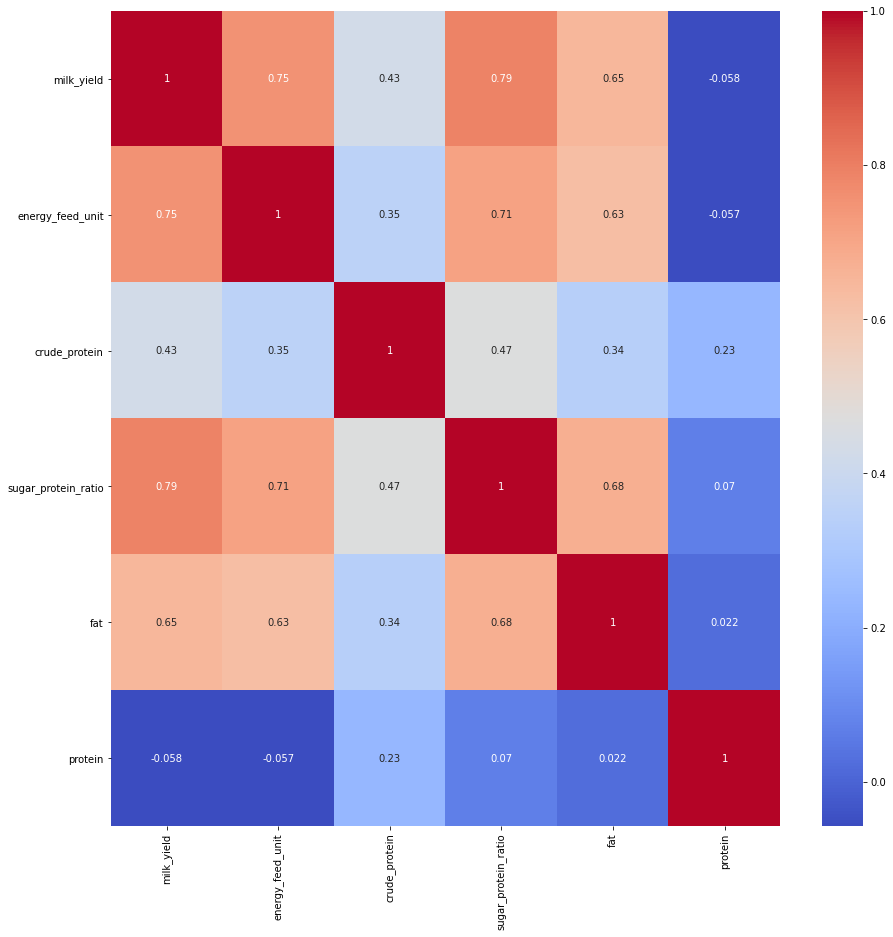

In [49]:
# построим хитмап отдельно для вкусного и невкусного молока
analysis_tasty = analysis[analysis['taste'] == 'вкусно']
sns.heatmap(analysis_tasty.corr(method= 'spearman'), cmap="coolwarm", annot=True)
plt.gcf().set_size_inches(15,15)

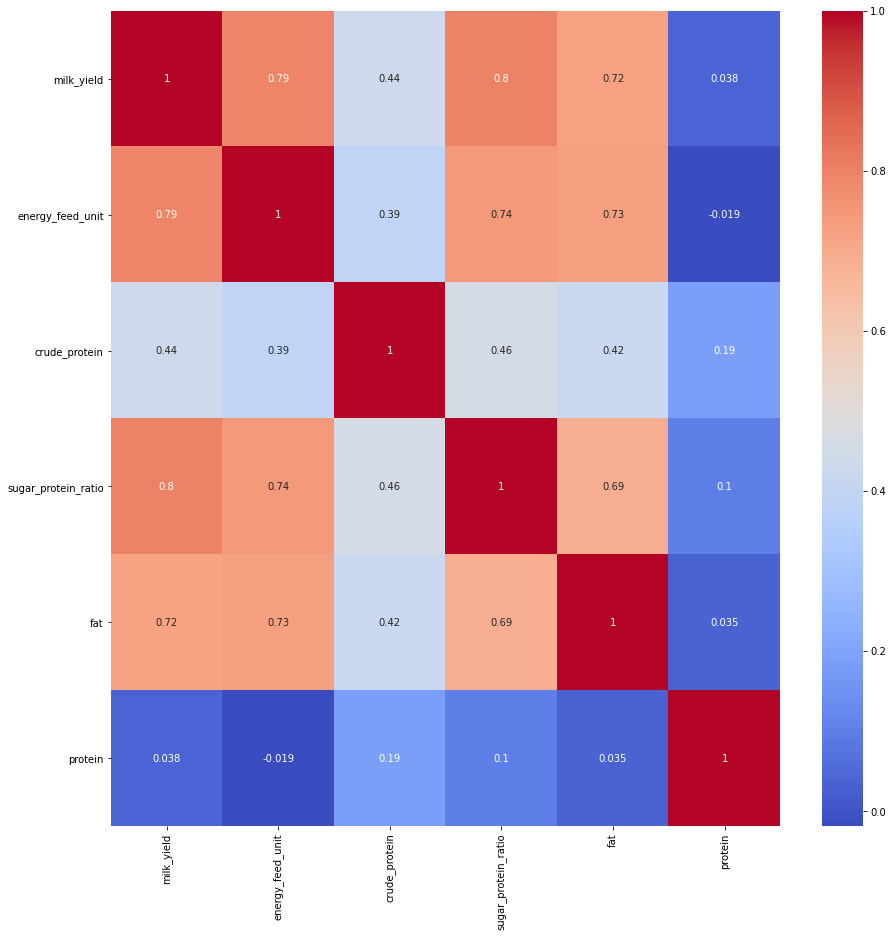

In [50]:
analysis_tasteless = analysis[analysis['taste'] == 'не вкусно']
sns.heatmap(analysis_tasteless.corr(method= 'spearman'), cmap="coolwarm", annot=True)
plt.gcf().set_size_inches(15,15)

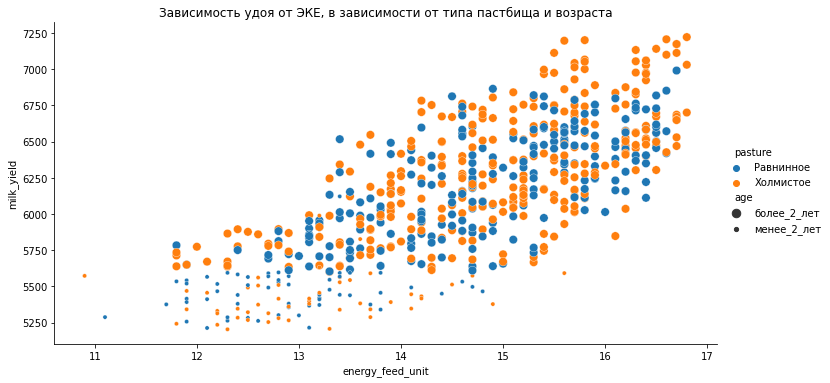

In [51]:
# построим диаграммы рассеяния  для признаков, с которыми есть корреляционная связь, 
# для удоя с учётом значений категориальных признаков

sns.relplot(data = data_main, x = 'energy_feed_unit', y ='milk_yield', hue = 'pasture', size = 'age', aspect = 2)
plt.title('Зависимость удоя от ЭКЕ, в зависимости от типа пастбища и возраста')
plt.xlabel('energy_feed_unit')
plt.ylabel('milk_yield')
plt.show()

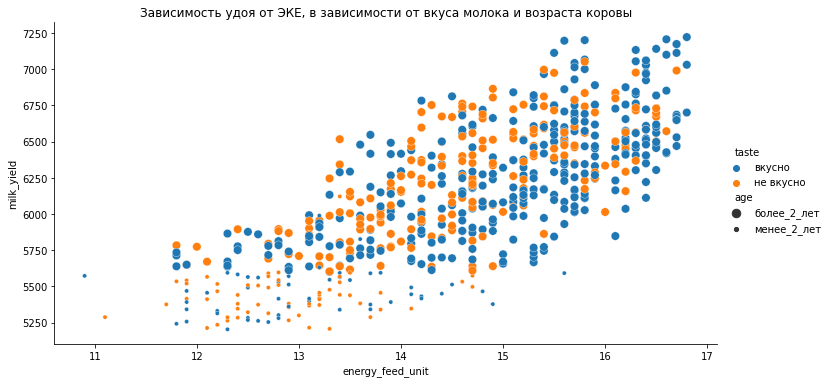

In [52]:
sns.relplot(data = data_main, x = 'energy_feed_unit', y ='milk_yield', hue = 'taste', size = 'age', aspect = 2)
plt.title('Зависимость удоя от ЭКЕ, в зависимости от вкуса молока и возраста коровы')
plt.xlabel('energy_feed_unit')
plt.ylabel('milk_yield')
plt.show()

Есть зависимость от возраста коров: удой у коров, которые старше двух лет, больше.

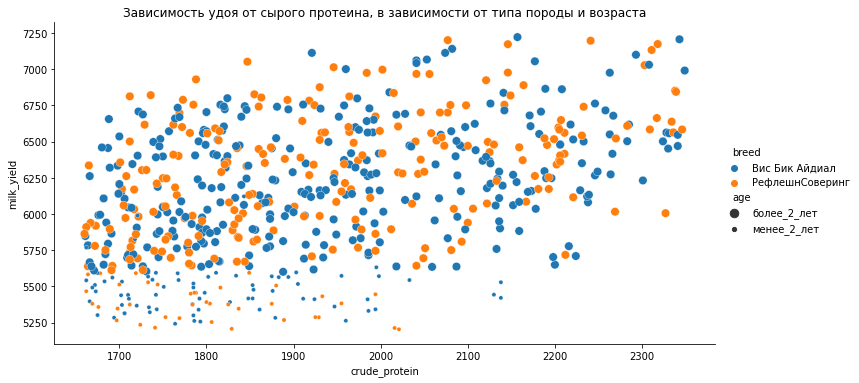

In [53]:
sns.relplot(data = data_main, x = 'crude_protein', y ='milk_yield', hue = 'breed', size = 'age', aspect = 2)
plt.title('Зависимость удоя от сырого протеина, в зависимости от типа породы и возраста')
plt.xlabel('crude_protein')
plt.ylabel('milk_yield')
plt.show()

Корреляция удоя и сырого протеина: 0.45 - слабая корреляция.

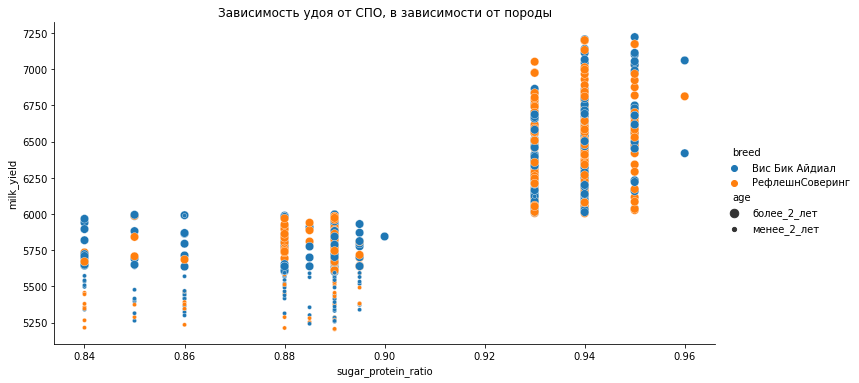

In [54]:
sns.relplot(data = data_main, x = 'sugar_protein_ratio', y ='milk_yield', hue = 'breed', size = 'age', aspect = 2)
plt.title('Зависимость удоя от СПО, в зависимости от породы')
plt.xlabel('sugar_protein_ratio')
plt.ylabel('milk_yield')
plt.show()

Корреляция удоя и СПО - сильная, но нелинейная.

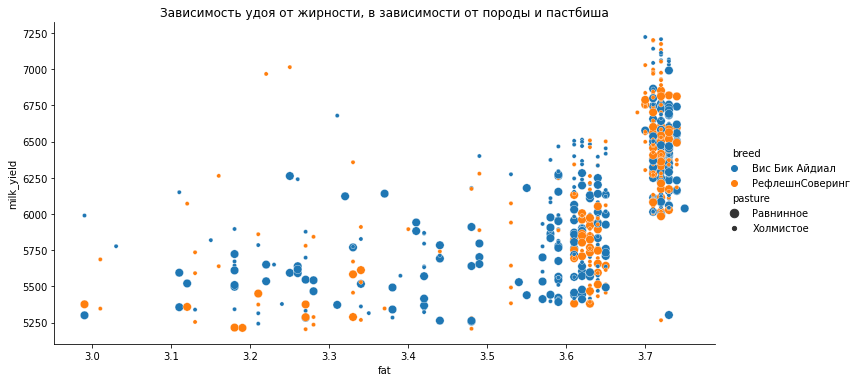

In [55]:
sns.relplot(data = data_main, x = 'fat', y ='milk_yield', hue = 'breed', size = 'pasture', aspect = 2)
plt.title('Зависимость удоя от жирности, в зависимости от породы и пастбиша')
plt.xlabel('fat')
plt.ylabel('milk_yield')
plt.show()

Корреляция удоя и жирности - умеренная, но нелинейная.

In [56]:
#  Объединим данные  в один датафрейм
data_main = pd.merge(data_main, data_dad, on='id')
data_main.head()

,id,milk_yield,energy_feed_unit,crude_protein,sugar_protein_ratio,breed,pasture,dad_breed,fat,protein,taste,age,dad
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет,Буйный
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинное,Соверин,3.54,3.079,вкусно,менее_2_лет,Соловчик
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет,Барин
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет,Буйный
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинное,Соверин,3.73,3.073,вкусно,менее_2_лет,Барин


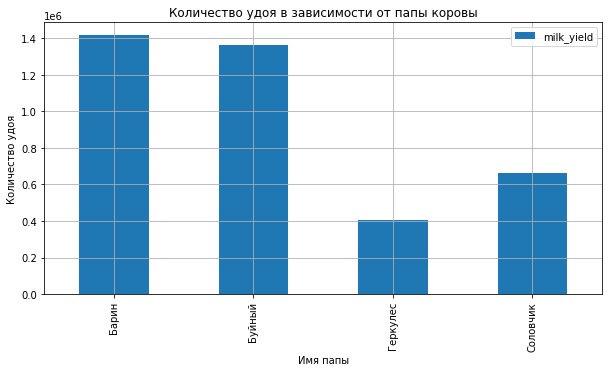

In [57]:
# проведем анализ взаимосвязи суммы удоя и имени папы коровы
(
    data_main.pivot_table(index='dad', values='milk_yield', aggfunc='sum')
    .plot(kind='bar' , grid=True, figsize=(10, 5))
)
plt.title('Количество удоя в зависимости от папы коровы')
plt.xlabel('Имя папы')
plt.ylabel('Количество удоя')
plt.show()


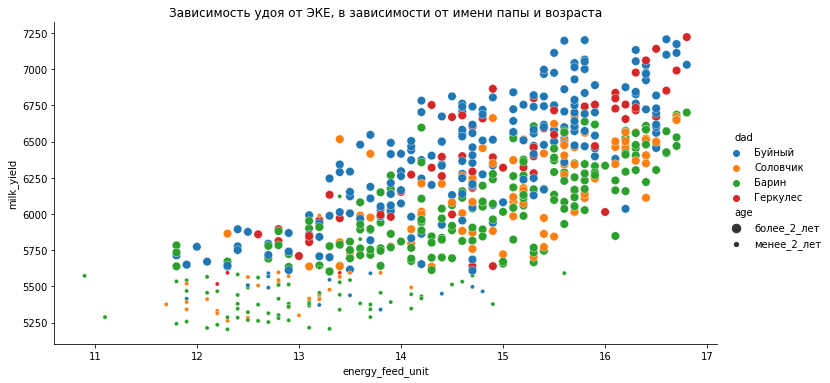

In [58]:
sns.relplot(data = data_main, x = 'energy_feed_unit', y ='milk_yield', hue = 'dad', size = 'age', aspect = 2)
plt.title('Зависимость удоя от ЭКЕ, в зависимости от имени папы и возраста')
plt.xlabel('energy_feed_unit')
plt.ylabel('milk_yield')
plt.show()

У коров со всеми именами пап прослеживается линейная зависимость количества удоя от основного признака (ЭКЕ).

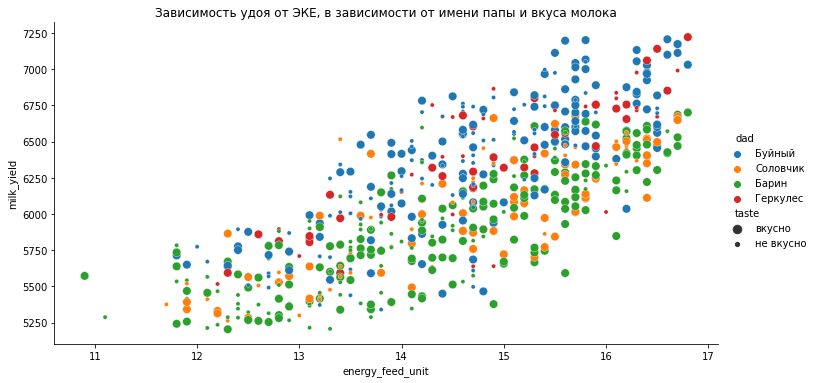

In [59]:
sns.relplot(data = data_main, x = 'energy_feed_unit', y ='milk_yield', hue = 'dad', size = 'taste', aspect = 2)
plt.title('Зависимость удоя от ЭКЕ, в зависимости от имени папы и вкуса молока')
plt.xlabel('energy_feed_unit')
plt.ylabel('milk_yield')
plt.show()

У коров со всеми именами пап молоко бывает как вкусным, так и невкусным.

Выводы:


Сильная корреляция (0.77) наблюдается между признаками удой и ЭКЕ, между признаками удой и СПО (0.81, нелинейная), средняя корреляция между признаками удой и жирность (0.6, нелинейная), слабая корреляция между удой. Есть зависимость от возраста коров: удой у коров, которые старше двух лет, больше. У коров с именем папы Барин и Буйный больше удой, у коров со всеми именами пап прослеживается линейная зависимость количества удоя от основного признака (ЭКЕ) и молоко бывает как вкусным, так и невкусным.


## Обучение модели линейной регрессии

Первая модель будет прогнозировать возможный удой коровы (целевой признак - удой).

In [60]:
pip show scikit-learn

Name: scikit-learn
Version: 1.5.1
Summary: A set of python modules for machine learning and data mining
Home-page: https://scikit-learn.org
Author: None
Author-email: None
License: new BSD
Location: /opt/conda/lib/python3.9/site-packages
Requires: numpy, joblib, scipy, threadpoolctl
Required-by: pyod, lightgbm
Note: you may need to restart the kernel to use updated packages.


In [61]:
# Для датасета с входными признаками отброшены столбцы с id, белком, жирностью и вкусом полученного молока, 
# т.к. эти показатели не влиют на удой
y = data_main['milk_yield']
X = data_main.drop(['milk_yield', 'protein', 'fat', 'taste', 'id'], axis = 1)


X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(
        X, 
        y, 
        random_state=RANDOM_STATE
    ) 

cat_col_names = ['breed', 'pasture', 'dad_breed', 'age']
num_col_names = ['energy_feed_unit', 'crude_protein', 'sugar_protein_ratio']

encoder_1 = OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)
X_train_ohe_1 = encoder_1.fit_transform(X_train_1[cat_col_names])
X_test_ohe_1 = encoder_1.transform(X_test_1[cat_col_names])

encoder_col_names_1 = encoder_1.get_feature_names_out(input_features=cat_col_names)

scaler_1 = StandardScaler()
X_train_scaled_1 = scaler_1.fit_transform(X_train_1[num_col_names])
X_test_scaled_1 = scaler_1.transform(X_test_1[num_col_names])


X_train_ohe_1 = pd.DataFrame(X_train_ohe_1, columns= encoder_col_names_1)
X_test_ohe_1 = pd.DataFrame(X_test_ohe_1, columns= encoder_col_names_1)
X_train_scaled_1 = pd.DataFrame(X_train_scaled_1, columns= num_col_names)
X_test_scaled_1 = pd.DataFrame(X_test_scaled_1, columns= num_col_names)

X_train_1 = pd.concat([X_train_ohe_1, X_train_scaled_1], axis=1)
X_test_1 = pd.concat([X_test_ohe_1, X_test_scaled_1], axis=1)

model_lr_1 = LinearRegression()
model_lr_1.fit(X_train_1, y_train_1)
predictions_1 = model_lr_1.predict(X_test_1)

residuals_1 = y_test_1 - predictions_1
r2_1 = r2_score(y_test_1, predictions_1)

print('R2:', r2_1)

R2: 0.7844078173416967


Значение R² варьируется от 0 до 1, где 1 означает идеальное соответствие. Полученное значение неблизко к 1.

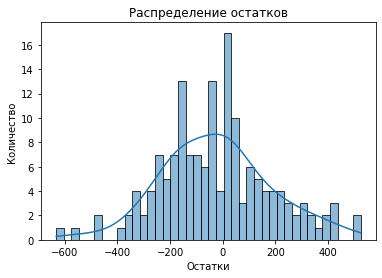

In [62]:
# проанализируем остатки с помощью графиков
sns.histplot(data = y_test_1-predictions_1, bins = 40, kde=True)
plt.xlabel('Остатки')
plt.ylabel('Количество')
plt.title('Распределение остатков')  
plt.show()

На графике несколько пиков.

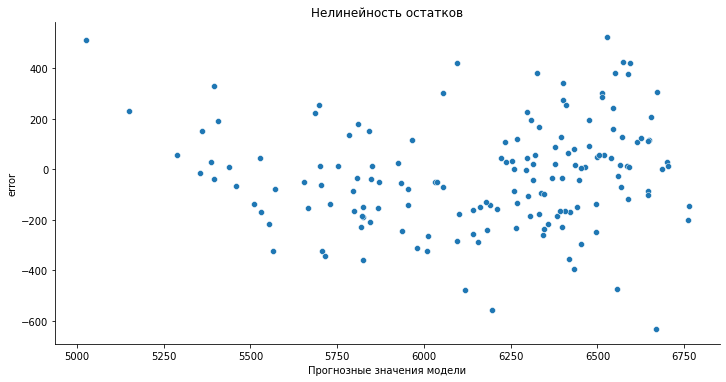

In [63]:
sns.relplot(x = predictions_1, y =y_test_1-predictions_1, aspect = 2)
plt.xlabel('Прогнозные значения модели')
plt.ylabel('error')
plt.title('Нелинейность остатков')
plt.show()

После значения 6250 остатков больше.

На графике остатков несколько пиков, после значения 6250 остатков больше, можно предположить, что модель требует улучшений.

Вторая модель будет прогнозировать возможный удой коровы (целевой признак - удой) с учётом связи входных признаков с целевым. 

In [64]:
#Переведём СПО в категориальный бинарный признак
data_main['sugar_protein_ratio_ohe'] = (data_main['sugar_protein_ratio'] < 0.92).astype('int')

display(data_main.head())

,id,milk_yield,energy_feed_unit,crude_protein,sugar_protein_ratio,breed,pasture,dad_breed,fat,protein,taste,age,dad,sugar_protein_ratio_ohe
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет,Буйный,1
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинное,Соверин,3.54,3.079,вкусно,менее_2_лет,Соловчик,1
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет,Барин,1
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет,Буйный,1
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинное,Соверин,3.73,3.073,вкусно,менее_2_лет,Барин,1


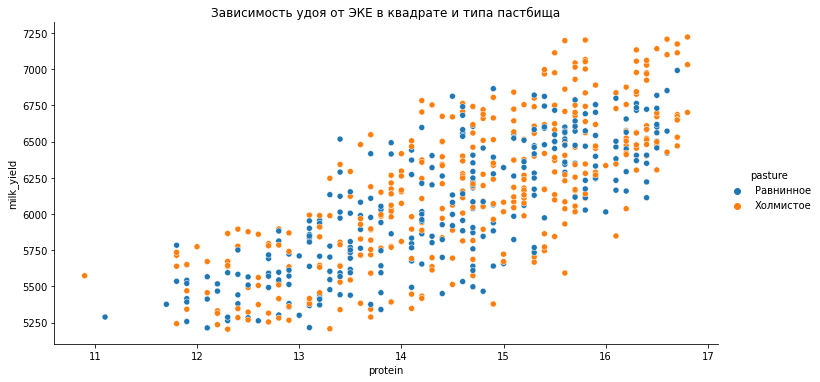

In [65]:
#Добавим новый признак ЭКЕ в квадрате
data_main['energy_feed_unit_squared'] = data_main['energy_feed_unit']**2
sns.relplot(data = data_main, x = 'energy_feed_unit', y ='milk_yield', hue = 'pasture', aspect = 2)
plt.title('Зависимость удоя от ЭКЕ в квадрате и типа пастбища')
plt.xlabel('protein')
plt.ylabel('milk_yield')
plt.show()

In [66]:
y = data_main['milk_yield']
X = data_main.drop(['milk_yield', 'protein', 'fat', 'taste', 'id', 'sugar_protein_ratio'], axis = 1)


X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X, y, random_state= RANDOM_STATE)

cat_col_names = ['sugar_protein_ratio_ohe','breed', 'pasture', 'dad_breed', 'age']
num_col_names = ['crude_protein', 'energy_feed_unit_squared']

encoder_2 = OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)
X_train_ohe_2 = encoder_2.fit_transform(X_train_2[cat_col_names])
X_test_ohe_2 = encoder_2.transform(X_test_2[cat_col_names])

encoder_col_names_2 = encoder_2.get_feature_names_out(input_features=cat_col_names)

scaler_2 = StandardScaler()
X_train_scaled_2 = scaler_2.fit_transform(X_train_2[num_col_names])
X_test_scaled_2 = scaler_2.transform(X_test_2[num_col_names])

X_train_ohe_2 = pd.DataFrame(X_train_ohe_2, columns= encoder_col_names_2)
X_test_ohe_2 = pd.DataFrame(X_test_ohe_2, columns= encoder_col_names_2)
X_train_scaled_2 = pd.DataFrame(X_train_scaled_2, columns= num_col_names)
X_test_scaled_2 = pd.DataFrame(X_test_scaled_2, columns= num_col_names)

X_train_2 = pd.concat([X_train_ohe_2, X_train_scaled_2], axis=1)
X_test_2 = pd.concat([X_test_ohe_2, X_test_scaled_2], axis=1)

model_lr_2 = LinearRegression()
model_lr_2.fit(X_train_2, y_train_2)
predictions_2 = model_lr_2.predict(X_test_2)

residuals_2 = y_test_2 - predictions_2
r2_2 = r2_score(y_test_2, predictions_2)

print('R2:', r2_2)

R2: 0.8180879926867503


Значение метрики выросло на с 0.78 до 0.81.

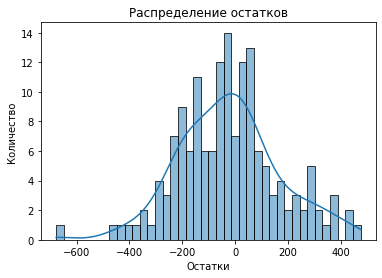

In [67]:
# проанализируем остатки с помощью графиков
sns.histplot(data = y_test_2-predictions_2, bins = 40, kde=True)
plt.xlabel('Остатки')
plt.ylabel('Количество')
plt.title('Распределение остатков')  
plt.show()

На графике несколько пиков.

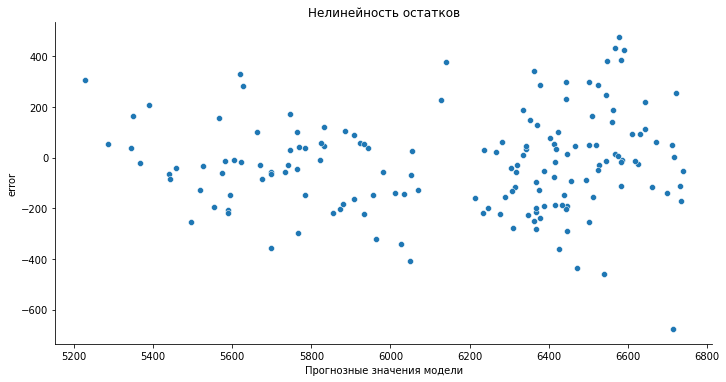

In [68]:
sns.relplot(x = predictions_2, y =y_test_2-predictions_2, aspect = 2)
plt.xlabel('Прогнозные значения модели')
plt.ylabel('error')
plt.title('Нелинейность остатков')
plt.show()

По сравнению с первой моделью была устранена нелинейность в признаках. Значение R² выросло, но на графике распределения остатков есть два пика, модель требует улучшений.

Третья модель будет прогнозировать возможный удой коровы, учитывая имя папы коровы.

In [69]:
y = data_main['milk_yield']
X = data_main.drop(['milk_yield', 'protein', 'fat', 'taste', 'energy_feed_unit','id', 'sugar_protein_ratio'], axis = 1)

X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X, y, random_state= RANDOM_STATE)

cat_col_names = ['sugar_protein_ratio_ohe','breed', 'pasture', 'dad_breed', 'age', 'dad']
num_col_names = ['crude_protein', 'energy_feed_unit_squared']

encoder_3 = OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)
X_train_ohe_3 = encoder_3.fit_transform(X_train_3[cat_col_names])
X_test_ohe_3 = encoder_3.transform(X_test_3[cat_col_names])

encoder_col_names_3 = encoder_3.get_feature_names_out(input_features=cat_col_names)

scaler_3 = StandardScaler()
X_train_scaled_3 = scaler_3.fit_transform(X_train_3[num_col_names])
X_test_scaled_3 = scaler_3.transform(X_test_3[num_col_names])

X_train_ohe_3 = pd.DataFrame(X_train_ohe_3, columns= encoder_col_names_3)
X_test_ohe_3 = pd.DataFrame(X_test_ohe_3, columns= encoder_col_names_3)
X_train_scaled_3 = pd.DataFrame(X_train_scaled_3, columns= num_col_names)
X_test_scaled_3 = pd.DataFrame(X_test_scaled_3, columns= num_col_names)

X_train_3 = pd.concat([X_train_ohe_3, X_train_scaled_3], axis=1)
X_test_3 = pd.concat([X_test_ohe_3, X_test_scaled_3], axis=1)

model_lr_3 = LinearRegression()
model_lr_3.fit(X_train_3, y_train_3)
predictions_3 = model_lr_3.predict(X_test_3)

residuals_3 = y_test_3 - predictions_3
r2_3 = r2_score(y_test_3, predictions_3)

print('R2:', r2_3)

R2: 0.8247542745210406


Значение метрики немного, но выросло.

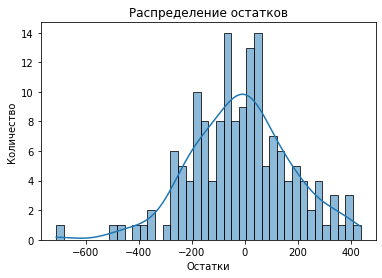

In [70]:
# проанализируем остатки с помощью графиков
sns.histplot(data = y_test_3-predictions_3, bins = 40, kde=True)
plt.xlabel('Остатки')
plt.ylabel('Количество')
plt.title('Распределение остатков')  
plt.show()

Есть несколько пиков на графике.

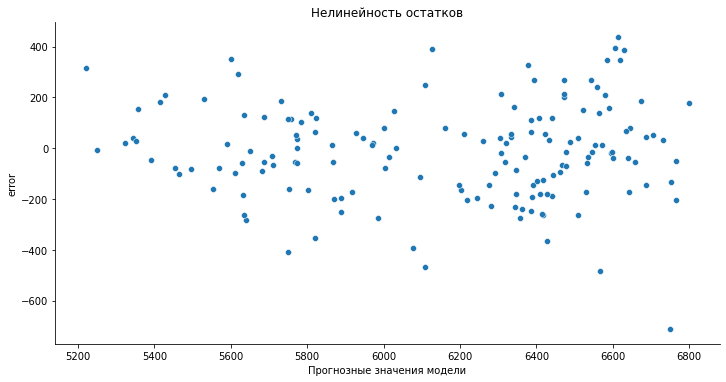

In [71]:
sns.relplot(x = predictions_3, y =y_test_3-predictions_3, aspect = 2)
plt.xlabel('Прогнозные значения модели')
plt.ylabel('error')
plt.title('Нелинейность остатков')
plt.show()

r2 = 0.82 - лучший показатель из трех моделей.

In [72]:
# Сравним основные метрики моделей по метрике МАЕ
mae_1 = mean_absolute_error(y_test_1, predictions_1)
mae_2 = mean_absolute_error(y_test_2, predictions_2)
mae_3 = mean_absolute_error(y_test_3, predictions_3)
print('МАЕ модели № 1:', mae_1)
print('МАЕ модели № 2:', mae_2)
print('МАЕ модели № 3:', mae_3)

МАЕ модели № 1: 164.24194463474925
МАЕ модели № 2: 149.03965222364604
МАЕ модели № 3: 146.16302445362322


In [73]:
# Сравним основные метрики моделей по метрике МSE
mse_1 = mean_squared_error(y_test_1, predictions_1)
mse_2 = mean_squared_error(y_test_2, predictions_2)
mse_3 = mean_squared_error(y_test_3, predictions_3)
print('MSE модели № 1:', mse_1)
print('MSE модели № 2:', mse_2)
print('MSE модели № 3:', mse_3)

MSE модели № 1: 43887.015009660514
MSE модели № 2: 37030.911311136944
MSE модели № 3: 35673.88988618195


In [74]:
# Сравним основные метрики моделей по метрике RМSE
rmse_1 = mean_squared_error(y_test_1, predictions_1, squared= False)
rmse_2 = mean_squared_error(y_test_2, predictions_2, squared= False)
rmse_3 = mean_squared_error(y_test_3, predictions_3, squared= False)
print('RMSE модели № 1:', rmse_1)
print('RMSE модели № 2:', rmse_2)
print('RMSE модели № 3:', rmse_3)

RMSE модели № 1: 209.4922791170608
RMSE модели № 2: 192.43417396901452
RMSE модели № 3: 188.8753289505592


/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Сравнивая метрики MSE, MAE и RMSE можно прийти к выводу, что третья модель наилучшая, т.к. ее предсказания точней.

In [75]:
# Спрогнозируем удой коров в датасете data_cow
# добавим столбцы с данными
data_cow['energy_feed_unit'] = data_main['energy_feed_unit'].mean()*1.05
data_cow['energy_feed_unit_squared'] = data_cow['energy_feed_unit'] ** 2
data_cow['crude_protein'] = data_main['crude_protein'].mean()*1.05
data_cow['sugar_protein_ratio'] = data_main['sugar_protein_ratio'].mean()*1.05
data_cow['sugar_protein_ratio_ohe'] = (data_cow['sugar_protein_ratio'] < 0.92).astype('int')
display(data_cow.head())

,breed,pasture,dad_breed,dad,current_fat,current_protein,age,energy_feed_unit,energy_feed_unit_squared,crude_protein,sugar_protein_ratio,sugar_protein_ratio_ohe
0,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.276162,233.361138,2019.947532,0.958744,0
1,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,15.276162,233.361138,2019.947532,0.958744,0
2,РефлешнСоверинг,Равнинное,Соверин,Барин,3.59,3.074,более_2_лет,15.276162,233.361138,2019.947532,0.958744,0
3,РефлешнСоверинг,Холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,15.276162,233.361138,2019.947532,0.958744,0
4,РефлешнСоверинг,Равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,15.276162,233.361138,2019.947532,0.958744,0


In [76]:
X_new = data_cow.drop(['current_protein', 'current_fat', 'energy_feed_unit', 'sugar_protein_ratio'], axis = 1)

X_new_ohe = encoder_3.transform(X_new[cat_col_names])
X_new_scaled = scaler_3.transform(X_new[num_col_names])

X_new_ohe = pd.DataFrame(X_new_ohe, columns= encoder_col_names_3)
X_new_scaled = pd.DataFrame(X_new_scaled, columns= num_col_names)
X_new = pd.concat([X_new_ohe, X_new_scaled], axis=1)

predictions_new = model_lr_3.predict(X_new)

In [77]:
data_cow['milk_yield'] = predictions_new
data_cow

,breed,pasture,dad_breed,dad,current_fat,current_protein,age,energy_feed_unit,energy_feed_unit_squared,crude_protein,sugar_protein_ratio,sugar_protein_ratio_ohe,milk_yield
0,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.276162,233.361138,2019.947532,0.958744,0,6609.919297
1,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,15.276162,233.361138,2019.947532,0.958744,0,6378.711028
2,РефлешнСоверинг,Равнинное,Соверин,Барин,3.59,3.074,более_2_лет,15.276162,233.361138,2019.947532,0.958744,0,6283.999775
3,РефлешнСоверинг,Холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,15.276162,233.361138,2019.947532,0.958744,0,6593.089377
4,РефлешнСоверинг,Равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,15.276162,233.361138,2019.947532,0.958744,0,6542.146066
5,РефлешнСоверинг,Равнинное,Соверин,Геркулес,3.63,3.053,менее_2_лет,15.276162,233.361138,2019.947532,0.958744,0,6425.380218
6,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.276162,233.361138,2019.947532,0.958744,0,6609.919297
7,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.57,3.079,более_2_лет,15.276162,233.361138,2019.947532,0.958744,0,6571.259737
8,РефлешнСоверинг,Равнинное,Соверин,Барин,3.59,3.074,более_2_лет,15.276162,233.361138,2019.947532,0.958744,0,6283.999775
9,РефлешнСоверинг,Холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет,15.276162,233.361138,2019.947532,0.958744,0,6400.540668


Укажим доверительный интервал прогноза лучшей модели:

In [78]:
st.t.interval(confidence=0.975, df=len(data_cow['milk_yield'])-1, loc=np.mean(
    data_cow['milk_yield']), scale=st.sem(data_cow['milk_yield'])) 

(6378.184256702775, 6537.773652882649)

Выводы:

Были обучены три модели линейной регрессии, отобрана наилучшая согласно метрикам, спрогнозирован удой коров, которых фермер хочет купить.

## Обучение модели логистической регрессии

Подготовим данные и обучим модель логистической регресии, целевой признак - вкус.

In [79]:
# для удобства переименуем столбцы
data_cow.rename(columns = {'current_fat':'fat', 'current_protein':'protein'}, inplace=True)

In [80]:
# переведем жирность в категориальный признак
data_main.loc[data_main['fat'] <= 3.56, 'fat_ohe'] = 'низкая'
data_main.loc[(data_main['fat'] > 3.56) & (data_main['fat'] <= 3.68), 'fat_ohe'] =  'средняя'
data_main.loc[data_main['fat'] > 3.68, 'fat_ohe'] = 'высокая'          
data_main.head()

,id,milk_yield,energy_feed_unit,crude_protein,sugar_protein_ratio,breed,pasture,dad_breed,fat,protein,taste,age,dad,sugar_protein_ratio_ohe,energy_feed_unit_squared,fat_ohe
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет,Буйный,1,201.64,средняя
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинное,Соверин,3.54,3.079,вкусно,менее_2_лет,Соловчик,1,163.84,низкая
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет,Барин,1,196.00,средняя
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет,Буйный,1,153.76,низкая
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинное,Соверин,3.73,3.073,вкусно,менее_2_лет,Барин,1,163.84,высокая


In [81]:
data_cow.loc[data_cow['fat'] <= 3.56, 'fat_ohe'] = 'низкая'
data_cow.loc[(data_cow['fat'] > 3.56) & (data_cow['fat'] <= 3.68), 'fat_ohe'] = 'средняя'
data_cow.loc[data_cow['fat'] > 3.68, 'fat_ohe'] = 'высокая'
data_cow.head()

,breed,pasture,dad_breed,dad,fat,protein,age,energy_feed_unit,energy_feed_unit_squared,crude_protein,sugar_protein_ratio,sugar_protein_ratio_ohe,milk_yield,fat_ohe
0,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.276162,233.361138,2019.947532,0.958744,0,6609.919297,средняя
1,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,15.276162,233.361138,2019.947532,0.958744,0,6378.711028,низкая
2,РефлешнСоверинг,Равнинное,Соверин,Барин,3.59,3.074,более_2_лет,15.276162,233.361138,2019.947532,0.958744,0,6283.999775,средняя
3,РефлешнСоверинг,Холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,15.276162,233.361138,2019.947532,0.958744,0,6593.089377,низкая
4,РефлешнСоверинг,Равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,15.276162,233.361138,2019.947532,0.958744,0,6542.146066,средняя


In [82]:
y_t = data_main['taste']
X_t = data_main.drop(['taste','id', 'energy_feed_unit', 'milk_yield', 'sugar_protein_ratio','fat'], axis = 1)
X_train_t, X_test_t, y_train_t, y_test_t = train_test_split(X_t, y_t, random_state=RANDOM_STATE) 
cat_col_names = ['sugar_protein_ratio_ohe', 'breed', 'pasture', 'dad_breed', 'age','dad', 'fat_ohe']
num_col_names = ['crude_protein', 'energy_feed_unit_squared',  'protein']

In [83]:
encoder_t = OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)
X_train_ohe_t = encoder_t.fit_transform(X_train_t[cat_col_names])
X_test_ohe_t = encoder_t.transform(X_test_t[cat_col_names])

encoder_col_names_t = encoder_t.get_feature_names_out(input_features=cat_col_names)

scaler_t = StandardScaler()
X_train_scaled_t = scaler_t.fit_transform(X_train_t[num_col_names])
X_test_scaled_t = scaler_t.transform(X_test_t[num_col_names])

X_train_ohe_t = pd.DataFrame(X_train_ohe_t, columns=encoder_col_names_t)
X_test_ohe_t = pd.DataFrame(X_test_ohe_t, columns=encoder_col_names_t)

X_train_scaled_t = pd.DataFrame(X_train_scaled_t, columns=num_col_names)
X_test_scaled_t = pd.DataFrame(X_test_scaled_t, columns=num_col_names)

X_train_t = pd.concat([X_train_ohe_t, X_train_scaled_t], axis=1)
X_test_t = pd.concat([X_test_ohe_t, X_test_scaled_t], axis=1)

y_train_t = y_train_t.apply(lambda x: 1 if x == 'вкусно' else 0)
y_test_t = y_test_t.apply(lambda x: 1 if x == 'вкусно' else 0)

clf = LogisticRegression()
clf = clf.fit(X_train_t, y_train_t) 
y_pred_t = clf.predict(X_test_t)

In [84]:
# Оценим качество модели на тестовой выборке: рассчитаем метрики accuracy, recall, precision
accuracy_score(y_test_t, y_pred_t)

0.6496815286624203

In [85]:
recall_score(y_test_t, y_pred_t)

0.8636363636363636

In [86]:
precision_score(y_test_t, y_pred_t)

0.6386554621848739

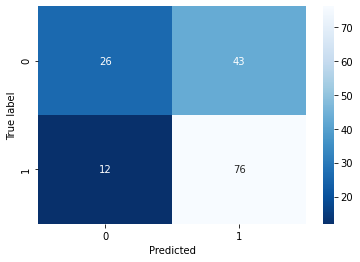

In [87]:
# Построим матрицу ошибок
cm = confusion_matrix(y_test_t, y_pred_t)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r')
plt.ylabel('True label')
plt.xlabel('Predicted'); 

Метрика recall составляет 0.86, метрика precision - 0.63. Для фермера главное - вкус молока, необходимо, чтобы precision равнялась 100 (чтобы коровы, дающие невкусное молоко, не были куплены). Изменим порог классификации так, чтобы достичь этого значения.

In [88]:
# поработаем с порогом классификации модели
y_proba = clf.predict_proba(X_test_t)[:,1]
data = pd.DataFrame(zip(y_test_t, y_proba), columns= ['y_test_t', 'y_proba']).sort_values(by= 'y_proba', ascending= False)
data.head()

,y_test_t,y_proba
66,1,0.862191
85,1,0.862053
147,1,0.861871
110,1,0.847237
8,1,0.827392


In [89]:
for threshold in np.arange(0,1,0.09):
    preds = np.where(clf.predict_proba(X_test_t)[:,1] > threshold, 1, 0)
    precision_res = precision_score(y_test_t, preds, zero_division= 1)
    acc_res = accuracy_score(y_test_t, preds)
    print('Порог', round(threshold, 1), 'значение Precision:', round(precision_res, 2), 'значение Accuracy:', round(acc_res, 2))

Порог 0.0 значение Precision: 0.56 значение Accuracy: 0.56
Порог 0.1 значение Precision: 0.56 значение Accuracy: 0.56
Порог 0.2 значение Precision: 0.56 значение Accuracy: 0.56
Порог 0.3 значение Precision: 0.56 значение Accuracy: 0.55
Порог 0.4 значение Precision: 0.58 значение Accuracy: 0.59
Порог 0.4 значение Precision: 0.61 значение Accuracy: 0.62
Порог 0.5 значение Precision: 0.65 значение Accuracy: 0.65
Порог 0.6 значение Precision: 0.78 значение Accuracy: 0.72
Порог 0.7 значение Precision: 0.81 значение Accuracy: 0.61
Порог 0.8 значение Precision: 1.0 значение Accuracy: 0.48
Порог 0.9 значение Precision: 1.0 значение Accuracy: 0.44
Порог 1.0 значение Precision: 1.0 значение Accuracy: 0.44


Для увеличения Precision выберем порог 0.81.

In [90]:
threshold = 0.81
preds = np.where(clf.predict_proba(X_test_t)[:,1] > threshold, 1, 0)

In [91]:
acc_res = accuracy_score(y_test_t, preds)
precision_res = precision_score(y_test_t, preds)
recall_res = recall_score(y_test_t, preds)
print('Accuracy =', round(acc_res, 2))
print('Recall =', round(recall_res, 2))
print('Precision =', round(precision_res, 2))

Accuracy = 0.48
Recall = 0.08
Precision = 1.0


Посмотрим на матрицу ошибок

Text(0.5, 1.0, 'Матрица ошибок')

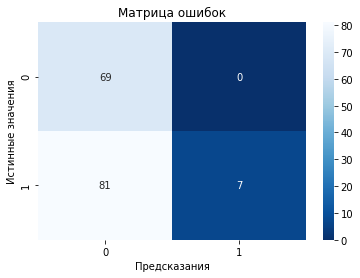

In [92]:
cm_2 = confusion_matrix(y_test_t, preds)
sns.heatmap(cm_2, annot= True, fmt= 'd', cmap= 'Blues_r')
plt.ylabel('Истинные значения')
plt.xlabel('Предсказания')
plt.title('Матрица ошибок')

Удалось минимизировать ошибки при определении вкусного молока.

In [93]:
X_new_t = data_cow.drop(['energy_feed_unit', 'sugar_protein_ratio', 'milk_yield', 'fat'], axis=1)
X_new_t_ohe = encoder_t.transform(X_new_t[cat_col_names])
X_new_t_scaled = scaler_t.transform(X_new_t[num_col_names])

X_new_t_ohe = pd.DataFrame(X_new_t_ohe, columns= encoder_col_names_t)
X_new_t_scaled = pd.DataFrame(X_new_t_scaled, columns= num_col_names)
X_new_t = pd.concat([X_new_t_ohe, X_new_t_scaled], axis=1)

preds = np.where(clf.predict_proba(X_new_t)[:,1] > threshold, 1, 0)

In [94]:
taste = []
for pred in preds:
    if pred == 1:
        taste.append('вкусно')
    else:
        taste.append('не вкусно')
        
taste

['не вкусно',
 'не вкусно',
 'не вкусно',
 'не вкусно',
 'не вкусно',
 'не вкусно',
 'не вкусно',
 'не вкусно',
 'не вкусно',
 'не вкусно',
 'не вкусно',
 'не вкусно',
 'не вкусно',
 'не вкусно',
 'не вкусно',
 'не вкусно',
 'не вкусно',
 'не вкусно',
 'не вкусно',
 'не вкусно']

In [95]:
# добавим новый столбец в таблицу
data_cow['taste'] = taste

data_cow

,breed,pasture,dad_breed,dad,fat,protein,age,energy_feed_unit,energy_feed_unit_squared,crude_protein,sugar_protein_ratio,sugar_protein_ratio_ohe,milk_yield,fat_ohe,taste
0,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.276162,233.361138,2019.947532,0.958744,0,6609.919297,средняя,не вкусно
1,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,15.276162,233.361138,2019.947532,0.958744,0,6378.711028,низкая,не вкусно
2,РефлешнСоверинг,Равнинное,Соверин,Барин,3.59,3.074,более_2_лет,15.276162,233.361138,2019.947532,0.958744,0,6283.999775,средняя,не вкусно
3,РефлешнСоверинг,Холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,15.276162,233.361138,2019.947532,0.958744,0,6593.089377,низкая,не вкусно
4,РефлешнСоверинг,Равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,15.276162,233.361138,2019.947532,0.958744,0,6542.146066,средняя,не вкусно
5,РефлешнСоверинг,Равнинное,Соверин,Геркулес,3.63,3.053,менее_2_лет,15.276162,233.361138,2019.947532,0.958744,0,6425.380218,средняя,не вкусно
6,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.276162,233.361138,2019.947532,0.958744,0,6609.919297,средняя,не вкусно
7,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.57,3.079,более_2_лет,15.276162,233.361138,2019.947532,0.958744,0,6571.259737,средняя,не вкусно
8,РефлешнСоверинг,Равнинное,Соверин,Барин,3.59,3.074,более_2_лет,15.276162,233.361138,2019.947532,0.958744,0,6283.999775,средняя,не вкусно
9,РефлешнСоверинг,Холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет,15.276162,233.361138,2019.947532,0.958744,0,6400.540668,низкая,не вкусно


Выводы:

В рамках данного этапа была обучена модель логистическое регрессии, посчитаны метрики, подобран порог для минимизации ошибки первого рода, а также спрогнозирован вкус молока.

## Итоговые выводы

In [96]:
data_cow.loc[(data_cow['milk_yield'] > 6000) & (data_cow['taste'] == 'вкусно')]

,breed,pasture,dad_breed,dad,fat,protein,age,energy_feed_unit,energy_feed_unit_squared,crude_protein,sugar_protein_ratio,sugar_protein_ratio_ohe,milk_yield,fat_ohe,taste


Эти коровы подходят фермеру (удой более 6000 литров и вкусное молоко). Риск при их покупке минимальный. 

UPD: после внесения исправлений в код выяснилось, что таких коров нет.


Выводы:

На первом этапе работы были изучены данные. 
В датафрейме data_main 634 записи, названия столбцов адекватны содержащимся в них данным, но введены на кириллице, в столбцах id, Удой, Сырой протеин тип данных int, в столбцах ЭКЕ (Энергетическая кормовая единица), СПО (Сахаро-протеиновое соотношение), Порода, Тип пастбища, порода папы_быка, Жирность, Белок, Вкус молока, Возраст тип данных object.
В датафрейме data_dad 629 записи, названия столбцов адекватны содержащимся в них данным, но введены на кириллице, в столбце id тип данных int, в столбце Имя Папы тип данных object.
В датафрейме data_cow 20 записей, названия столбцов адекватны содержащимся в них данным, но введены на кириллице, в столбцах Тип пастбища, порода папы_быка, Имя_папы, Текущая_жирность, Текущий_уровень_белок, Возраст тип данных object.
Требовалась коректировка названий столбцов, изменение типа данных в ЭКЕ (Энергетическая кормовая единица), СПО (Сахаро-протеиновое соотношение), Жирность,%, Белок,%, Текущая_жирность,%, Текущий_уровень_белок,% на float (нужны будут для подсчета), а также предобработка данных (проверка наличия пропусков и дубликатов).


На этапе предобработки данных были изменены названия столбцов; проверено, нет ли пропущенных значений; были удалены явные и неявные дубликаты в data_main; столбцы energy_feed_unit, sugar_protein_ratio, fat, protein, current_fat, current_protein приведены к float типу.


Был проведен исследовательский анализ данных. Показатели удоя находятся в диапазоне от 5204 до 7222, медиана - 6132 (был удален выброс). Показатели питательности корма находятся в диапазоне от 10.9 до 16.8, медиана - 14.7. Показатель "сырой протеин" находится в диапазоне от 1660 до 2349, медиана - 1888. Показатели отношения сахара к протеину в корме находятся в диапазоне от 0.84 до 0.96, медиана - 0.93. Коровы породы Вис Бик Айдиал наиболее популярны (58%), Рефлешн Соверинг - 41%. Коров с холмистых пастбищ - 56%, а с холмистых - 44%. Породы папы коровы - Айдиал и Соверин - распределены в данных поровну. Показатели жирности молока находятся в диапазоне от 2.9 до 3.75, медиана - 3.65. Показатели белка находятся в диапазоне от 3.06 до 3.08, медиана - 3.07. 59% молока - вкусное. У 80% коров возраст более 2 лет.


Корреляционный анализ выявил сильную корреляцию (0.77) между признаками удой и ЭКЕ. Есть зависимость от возраста коров: удой у коров, которые старше двух лет, больше. У коров с именем папы Барин и Буйный больше удой, у коров со всеми именами пап прослеживается линейная зависимость количества удоя от основного признака (ЭКЕ) и молоко бывает как вкусным, так и невкусным.


При разработке моделей были использованы такие показатели как СПО, порода, пастбище, порода папы коровы, возраст, имя папы коровы, чистый протеин, ЭКЕ (для количества удоя) и СПО, порода, пастбище, порода папы коровы, возраст, папа коровы, чистый протеин, ЭКЕ, жирность и белок (для вкуса молока). Для первой модели были исключены такие признаки как: 'Вкус молока', 'Жирность в %' и 'Белок в %', т.к. они не оказывают влияния на удой.Для второй модели была устранена нелинейность в зависимости признаков 'Удой_кг' и 'СПО' путем преобразования признака 'СПО' в категориальный бинарный, используя в качестве границы значение 0.92; а также устранены нелинейность и в зависимости признаков 'Удой_кг' и 'ЭКЕ' путем возведения значений 'ЭКЕ' в квадрат.
Для трктьей модели был добавлен новый признак 'Имя папы'. Три модели сравнили по основным метрикам: R2, MAE, MSE, RMSE, построили для каждой модели гистограмму распределения остатков и диаграмму рассеяния для анализа дисперсии, рассчитали доверительный интервал. Исходя из сравнения метрик был сделан вывод, что третья модель наиболее точна, ее предсказания в среднем меньше отличаются от истинных значений, чем у первых двух моделей.

Для предсказания вкуса молока были подготовлены данные и обучена модель, после чего была построена матрица корреляции и рассчитаны основные метрики модели (Accuracy, Recall, Precision).Так как фермеру важно, чтобы молоко было вкусным, были минимизированы ложноположительные предсказания путем подбора порога классификации и улучшения метрики Precision.

В результате проделанной работы нельзя рекомендовать к покупке коров из датафрейма data_cow (прогнозируется удой более 6000 литров и вкусное молоко). Можно рекомендовать феремеру снизить уровень требований к вкусовым качествам молока или рассмотреть другой набор коров для покупки.